# Analyse stochastic simulations of parameter sweep ($\kappa$)

Author: Juvid Aryaman

In [1]:
import mitonetworks.det as mtd
import mitonetworks.stoch as mts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

In [2]:
warnings.simplefilter("ignore", UserWarning) # when generating svg's get lots of useless UserWarnings, so suppress them

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
mts.reset_plots()

In [5]:
analysis = mts.AnalyseDataFeedbackControl(dir_df_params = '../param_sweep_vals.csv',ctrl_name='lfc',
        dir_data = '../Data/',plotextensions=['png']
)
    
analysis.make_gradients()
analysis.compute_errors()

In [6]:
analysis.df_params

,b,beta,delta,gamma,kappa,mf_init,ms_init,mu,wf_init,ws_init,xi
0,0.000012,33.12,1.0,0.037851,0.000000,154,138,0.023,362,324,0.0
1,0.000012,33.12,1.0,0.037851,583.145173,374,178,0.023,872,415,0.0
2,0.000012,33.12,1.0,0.037851,1166.290346,567,195,0.023,1327,456,0.0
3,0.000012,33.12,1.0,0.037851,2332.580692,940,214,0.023,2189,499,0.0
4,0.000012,33.12,1.0,0.037851,3498.871037,1300,224,0.023,3032,522,0.0


In [7]:
kappa_nom = 11.662903457629223
R_k = analysis.df_params['kappa']/kappa_nom
n_k = len(R_k)

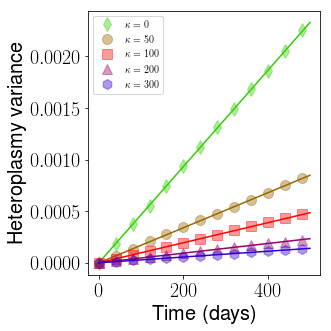

In [8]:
leg_list = [r"$\kappa={:.0f}$".format(R_k[i]) for i in range(n_k)]
analysis.plot_vh_param_sw(range(n_k), leg_list,figname="kappa_sw_lfc",sparsify_data=True)